In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
data: [] = list()
home: [] = list()
away: object = None
result_name: str = ''


In [27]:
#df = pd.read_csv('./data/202106_202106_연령별인구현황_월간.csv', encoding='UTF-8', thousands=',', index_col=0)
#df.to_csv('./data/202106_202106_연령별인구현황_월간_wo_comma.csv', sep=',', na_rep='NaN')
data = csv.reader(open('./data/202106_202106_연령별인구현황_월간_wo_comma.csv', 'rt', encoding='UTF-8'))
next(data)
data = list(data)

In [28]:
arr = []
[arr.append(int(j)) for i in data if '필동' in i[0] for j in i[3:]]
print([i for i in arr])

[16, 8, 11, 21, 13, 28, 19, 25, 24, 19, 22, 12, 10, 19, 22, 12, 14, 11, 30, 31, 45, 85, 73, 70, 81, 70, 65, 77, 89, 86, 79, 79, 71, 66, 68, 53, 65, 53, 67, 51, 60, 46, 50, 45, 46, 40, 44, 49, 49, 62, 51, 49, 70, 69, 60, 59, 62, 50, 64, 54, 70, 80, 74, 53, 57, 72, 68, 56, 44, 41, 37, 38, 43, 40, 34, 27, 29, 30, 41, 35, 32, 28, 22, 18, 17, 14, 23, 18, 11, 6, 6, 10, 9, 11, 4, 0, 2, 6, 2, 1, 9]


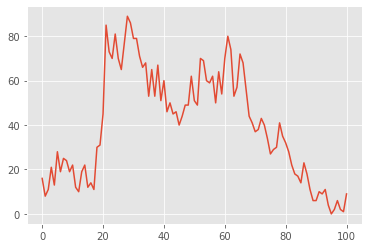

In [29]:
plt.style.use('ggplot')
plt.plot(arr)

In [30]:
home = []
[home.append(int(j)) for i in data if '필동' in i[0] for j in i[3:]]
print(home)

[16, 8, 11, 21, 13, 28, 19, 25, 24, 19, 22, 12, 10, 19, 22, 12, 14, 11, 30, 31, 45, 85, 73, 70, 81, 70, 65, 77, 89, 86, 79, 79, 71, 66, 68, 53, 65, 53, 67, 51, 60, 46, 50, 45, 46, 40, 44, 49, 49, 62, 51, 49, 70, 69, 60, 59, 62, 50, 64, 54, 70, 80, 74, 53, 57, 72, 68, 56, 44, 41, 37, 38, 43, 40, 34, 27, 29, 30, 41, 35, 32, 28, 22, 18, 17, 14, 23, 18, 11, 6, 6, 10, 9, 11, 4, 0, 2, 6, 2, 1, 9]


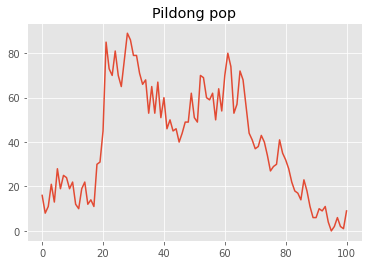

In [31]:
plt.title('Pildong pop')
plt.plot(arr)

In [54]:
home = []  # 정의되었던 self.home 을 local variable home 으로 변경해야
for i in data:
    if '필동' in i[0]:
        home = np.array(i[3:], dtype=int)/int(i[2])
        
away = []        
result = 0
mn = 1  # 최소값
for i in data:
    away = np.array(i[3:], dtype=int)/int(i[2])
    s = np.sum((home-away)**2)
    if s < mn and '필동' not in i[0]:  # s < 1
        mn = s
        result_name = i[0]
        result = away

<ipython-input-54-861fea1535b9>:10: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(i[3:], dtype=int)/int(i[2])


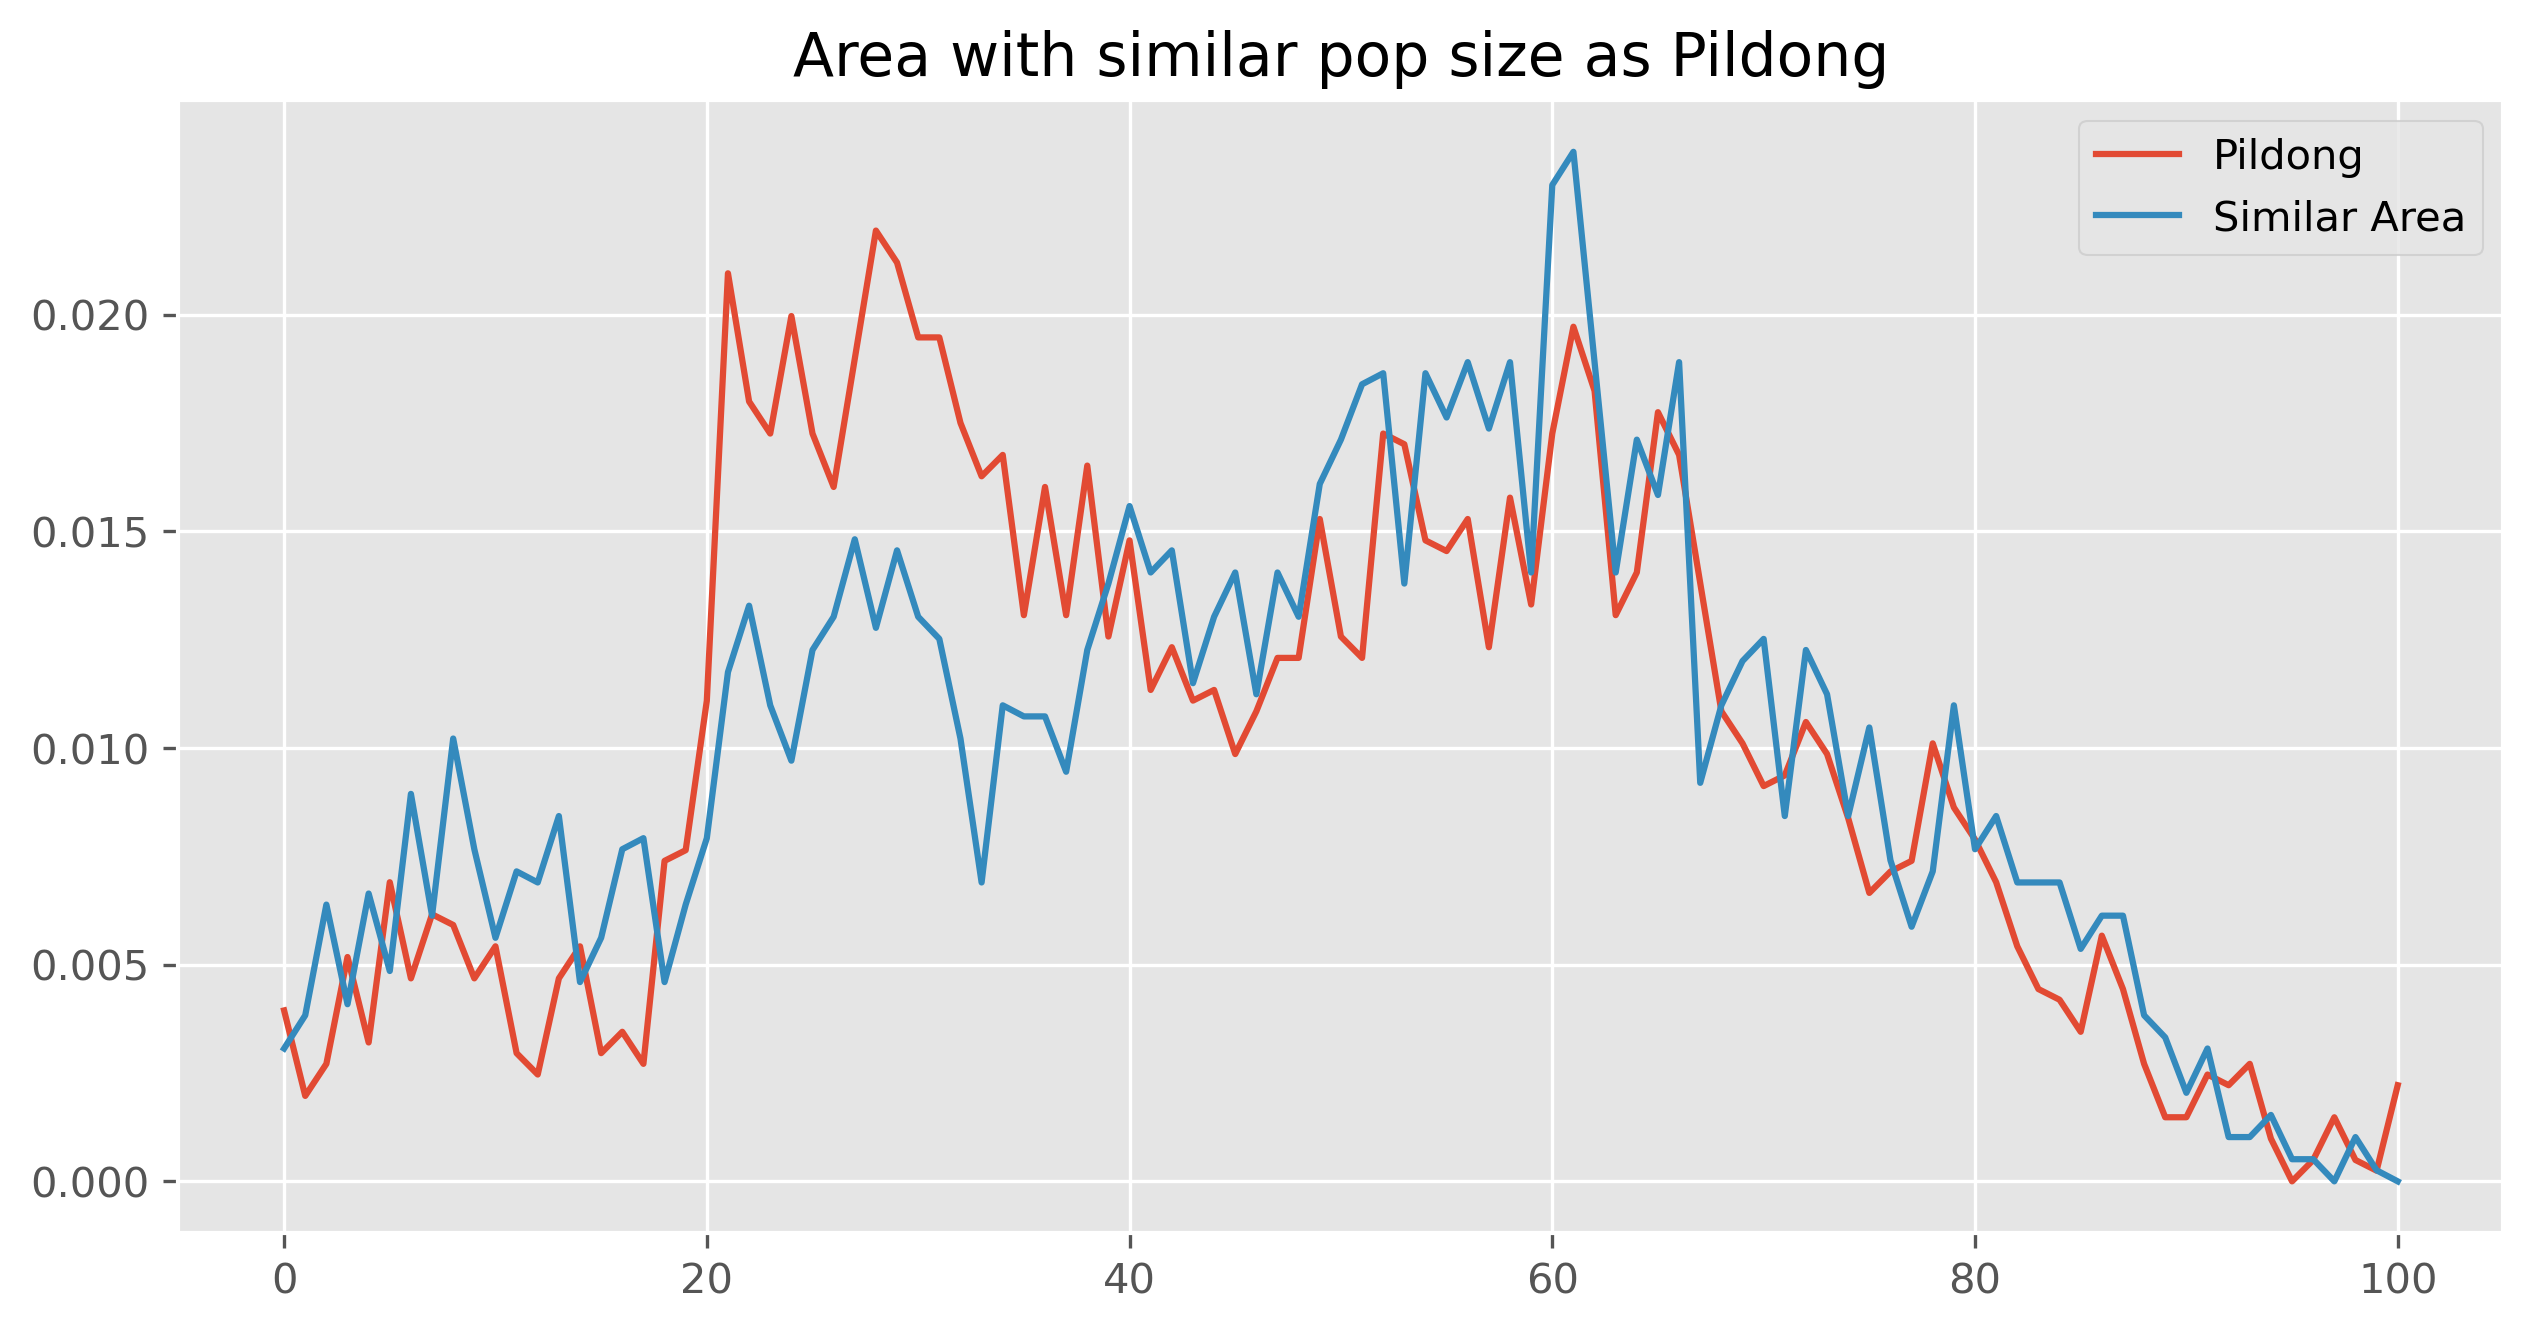

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5), dpi=300)
plt.title('Area with similar pop size as Pildong')
plt.plot(home, label='Pildong')
plt.plot(away, label='Similar Area')
plt.legend()